# RooStats Standard  Macros 

This notebook shows how to run the Standard RooStats macro

Tutorials we can use  (available in tutorials/roostats directory) are:
* StandardProfileLikelihoodDemo.C
* StandardBayesianNumericalDemo.C
* StandardBayesianMCMCDemo.C
* StandardHypoTestDemo.C
* StandardHypoTestInvDemo.C



#### Common Parameter passed to the macro 


**Standard..XXX...Demo** ( `filename, workspace, model config, data` )

you can also change some other parameters like the confidenceLevel or the number of points to scan. 
These variables are defined as global variables that you can change before running the macro 

#### 1. Running the ProfileLikelihood Demo

In [1]:
.L /opt/root/tutorials/roostats/StandardProfileLikelihoodDemo.C


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [3]:
optPL.confLevel = 0.68; 
optPL.nScanPoints = 50; 
//optPL.plotAsTF1 = true;  
//if (optPL.plotAsTF1) { poiMinPlot = 0; poiMaxPlot = 10;  }
optPL.doHypoTest = true;  // for doing an hypothesis test (default is for null poi value = 0)

[#1] INFO:Minization --  Including the following contraint terms in minimization: (constraint)
[#0] PROGRESS:Minization -- ProfileLikelihoodCalcultor::DoGLobalFit - find MLE 
[#0] PROGRESS:Minization -- ProfileLikelihoodCalcultor::DoMinimizeNLL - using Minuit / Migrad with strategy 1
[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_model_data_with_constr) Summation contains a RooNLLVar, using its error level
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (pdf)


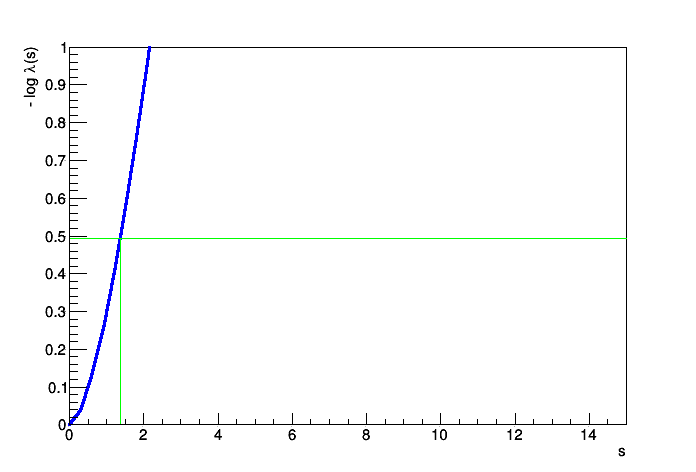

[#1] INFO:Minization -- 
  RooFitResult: minimized FCN value: 0.309508, estimated distance to minimum: 1.00104e-05
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 

    Floating Parameter    FinalValue +/-  Error   
  --------------------  --------------------------
                     b    9.9989e-01 +/-  1.99e-01
                     s    3.9499e-03 +/-  1.49e+01


>>>> RESULT : 68% interval on s is : [Warning: lower value for s is at limit 0
0, 1.35953]
 
making a plot of the profile likelihood function ....(if it is taking a lot of time use less points or the TF1 drawing option)
[#1] INFO:Minization -- RooProfileLL::evaluate(nll_model_data_with_constr_Profile[s]) Creating instance of MINUIT
[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_model_data_with_constr) Summation contains a RooNLLVar, using its error level
[#1] INFO:Minization -- RooProfileLL::evaluate(nll_model_data_with_constr_Profile[s]) determining

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


In [4]:
StandardProfileLikelihoodDemo("CountingModel.root","w","ModelConfig","data");
gPad->Draw();

#### 2. Running the Bayesian Numerical Calculator

In [5]:
.L /opt/root/tutorials/roostats/StandardBayesianNumericalDemo.C

In [8]:
optBayes.confLevel = 0.95; 
optBayes.intervalType = 0;
optBayes.nScanPoints = 50; // number of points used for drawing the interval

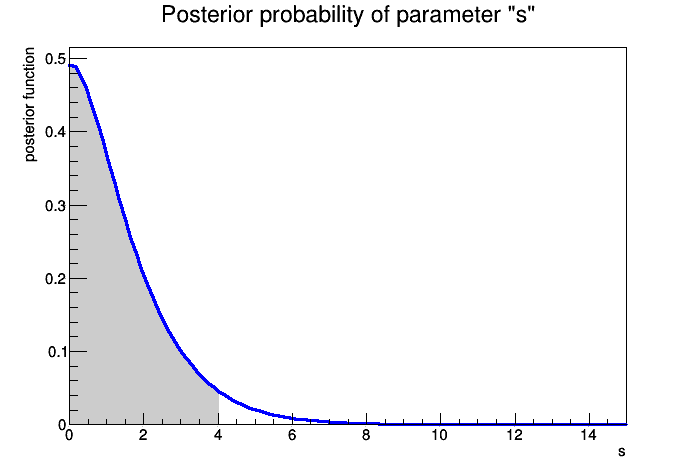

[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooUniform::prior
[#1] INFO:Minization --  Including the following contraint terms in minimization: (constraint)
[#1] INFO:Eval -- BayesianCalculator::GetPosteriorFunction :  nll value 1.92321 poi value = 3
[#1] INFO:Eval -- BayesianCalculator::GetPosteriorFunction : minimum of NLL vs POI for POI =  0 min NLL = 0.3095
[#1] INFO:Eval -- BayesianCalculator - computing shortest interval with CL = 0.95
[#1] INFO:Eval -- BayesianCalculator - scan posterior function in nbins = 100
[#0] WARNING:Eval -- BayesianCalculator::GetInterval : 1212 errors reported in evaluating log-likelihood function 
[#1] INFO:Eval -- BayesianCalculator::GetInterval - found a valid interval : [0 , 4.05 ]

>>>> RESULT : 95% interval on s is : [0, 4.05] 

Drawing plot of posterior function.....


In [9]:
StandardBayesianNumericalDemo("CountingModel.root","w","ModelConfig","data");
gPad->Draw();

#### 3. Running the BayesianMCMC Calculator

In [7]:
.L /opt/root/tutorials/roostats/StandardBayesianMCMCDemo.C

In [8]:
optMCMC.confLevel = 0.683; 
optMCMC.numIters = 1000000; // MCMC iterations (has to be larger than 1000)
optMCMC.intervalType = 1;   // central interval 

[#1] INFO:Minization --  Including the following contraint terms in minimization: (constraint)
Metropolis-Hastings progress: ....................................................................................................
[#1] INFO:Eval -- Proposal acceptance rate: 21.8172%
[#1] INFO:Eval -- Number of steps in chain: 218172


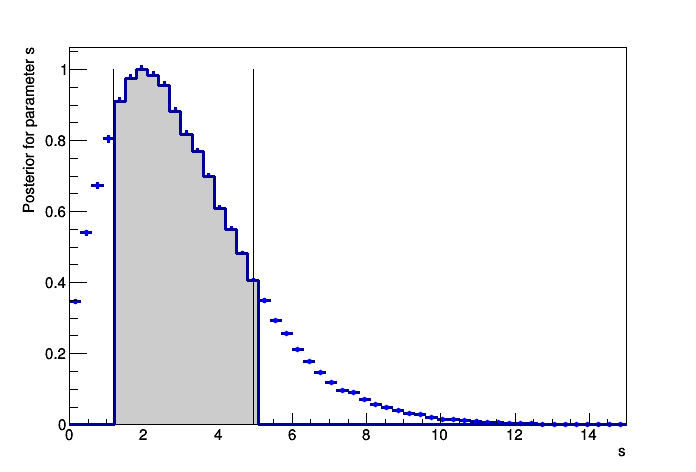


>>>> RESULT : 68.3% interval on s is : [1.17744, 4.96404] 


In [9]:
StandardBayesianMCMCDemo("CountingModel.root","w","ModelConfig","data");
gPad->Draw();

#### 4. Running the Frequentist Interval Calculator (Hypothesis Test Inversion)

In [10]:
.L /opt/root/tutorials/roostats/StandardHypoTestInvDemo.C

#### Parameter passed to the macro 

The **StandardHypoTestInvDemo** macro requires different parameters than the macro used before. We have the possibility to provide an alternate model and some required configuration parameters described below.

**StandardHypoTestInvDemo**`(filename, workspace, model for null, [model for alternate], data`
`calculator type, test statistic type, use CLs,` 
`number of points to scan , min value, max value, [number of toys] )`


Calculator Type: 
* 0 FrequentistCalculator (uses toys)
* 1 HybridCalculator (uses toys)
* 2 AsymptoticCalculator

Test Statistic Type

* 0 Ratio of Likelihood (LEP TS)
* 1 Ratio of Profile Likelihoods (Tevatron TS)
* 2 Profile Likelihood Ratio (LHC) - 2 sided (for intervals) 
* 3 Profile Likelihood Ratio (LHC) - One-sided (for limits)


In addition we can define some extra parameters

In [11]:
optHTInv.confLevel = 0.95;   // for upper limits
optHTInv.minimizerType = "Minuit2";
//optHTInv.useProof = true; 
//optHTInv.enableDetailedOutput = true; 

In [12]:
StandardHypoTestInvDemo("CountingModel.root","w","ModelConfig","","data",0,3,true,10,0,20, 1000);

0x7f82d7989200	CountingModel.root
Running HypoTestInverter on the workspace w

RooWorkspace(w) w contents

variables
---------
(b,b0,nobs,s,sigmab)

p.d.f.s
-------
RooGaussian::constraint[ x=b0 mean=b sigma=sigmab ] = 1
RooProdPdf::model[ pdf * constraint ] = 0.195367
RooPoisson::pdf[ x=nobs mean=nexp ] = 0.195367

functions
--------
RooAddition::nexp[ s + b ] = 4

datasets
--------
RooDataSet::data(nobs)

parameter snapshots
-------------------
ModelConfig__snapshot = (s=3)

named sets
----------
ModelConfig_GlobalObservables:(b0)
ModelConfig_NuisParams:(b)
ModelConfig_Observables:(nobs)
ModelConfig_POI:(s)
ModelConfig__snapshot:(s)

generic objects
---------------
RooStats::ModelConfig::ModelConfig

Using data set data
StandardHypoTestInvDemo : POI initial value:   s = 3
[#1] INFO:Minization --  Including the following contraint terms in minimization: (constraint)
[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_model_data_with_constr) Summation contains a RooNLLVar, using it

Info in <StandardHypoTestInvDemo>: The background model  does not exist
Info in <StandardHypoTestInvDemo>: Copy it from ModelConfig ModelConfig and set POI to zero
Info in <StandardHypoTestInvDemo>: Using Minuit2 as minimizer for computing the test statistic
Info in <StandardHypoTestInvDemo>:  Doing a first fit to the observed data 
Info in <StandardHypoTestInvDemo>: Pdf is not extended: number of events to generate taken  from observed data set is 1


[#0] PROGRESS:Generation -- generated toys: 500 / 1000
[#1] INFO:InputArguments -- Profiling conditional MLEs for Alt.
[#1] INFO:InputArguments -- Using a ToyMCSampler. Now configuring for Alt.
[#0] PROGRESS:Eval -- P values for  s =  0
	CLs      = 1 +/- 0
	CLb      = 1 +/- 0
	CLsplusb = 1 +/- 0

[#1] INFO:ObjectHandling -- RooWorkspace::saveSnaphot(w) replacing previous snapshot with name ModelConfig__snapshot
[#0] PROGRESS:Eval -- Running for s = 1.66667

=== Using the following for ModelConfig ===
Observables:             RooArgSet:: = (nobs)
Parameters of Interest:  RooArgSet:: = (s)
Nuisance Parameters:     RooArgSet:: = (b)
Global Observables:      RooArgSet:: = (b0)
PDF:                     RooProdPdf::model[ pdf * constraint ] = 0.219592
Snapshot:                
  1) 0x7f82d310a4a0 RooRealVar:: s = 1.66667  L(0 - 15)  "s"


=== Using the following for ModelConfig_with_poi_0 ===
Observables:             RooArgSet:: = (nobs)
Parameters of Interest:  RooArgSet:: = (s)
Nuisance Pa

Info in <Minuit2>: Minuit2Minimizer::Minimize : Minimization did NOT converge, Reached call limit


[#0] PROGRESS:Eval -- P values for  s =  6.66667
	CLs      = 0.0375783 +/- 0.00615934
	CLb      = 0.958 +/- 0.00897062
	CLsplusb = 0.036 +/- 0.00589101

[#1] INFO:ObjectHandling -- RooWorkspace::saveSnaphot(w) replacing previous snapshot with name ModelConfig__snapshot
[#0] PROGRESS:Eval -- Running for s = 8.33333

=== Using the following for ModelConfig ===
Observables:             RooArgSet:: = (nobs)
Parameters of Interest:  RooArgSet:: = (s)
Nuisance Parameters:     RooArgSet:: = (b)
Global Observables:      RooArgSet:: = (b0)
PDF:                     RooProdPdf::model[ pdf * constraint ] = 0.0119853
Snapshot:                
  1) 0x7f82d894a5e0 RooRealVar:: s = 8.33333  L(0 - 15)  "s"


=== Using the following for ModelConfig_with_poi_0 ===
Observables:             RooArgSet:: = (nobs)
Parameters of Interest:  RooArgSet:: = (s)
Nuisance Parameters:     RooArgSet:: = (b)
Global Observables:      RooArgSet:: = (b0)
PDF:                     RooProdPdf::model[ pdf * constraint ] = 0.0

Info in <Minuit2>: Minuit2Minimizer::Minimize : Minimization did NOT converge, Reached call limit


    ----> Doing a re-scan first
[#0] PROGRESS:Generation -- generated toys: 500 / 1000


Info in <Minuit2>: Minuit2Minimizer::Minimize : Minimization did NOT converge, Reached call limit


    ----> Doing a re-scan first


Info in <Minuit2>: Minuit2Minimizer::Minimize : Minimization did NOT converge, Reached call limit


    ----> Doing a re-scan first
    ----> Doing a re-scan first
[#1] INFO:InputArguments -- Profiling conditional MLEs for Alt.
[#1] INFO:InputArguments -- Using a ToyMCSampler. Now configuring for Alt.


Info in <Minuit2>: Minuit2Minimizer::Minimize : Minimization did NOT converge, Reached call limit
Info in <Minuit2>: Minuit2Minimizer::Minimize : Minimization did NOT converge, Reached call limit


[#0] PROGRESS:Eval -- P values for  s =  10
	CLs      = 0.00425532 +/- 0.00212394
	CLb      = 0.94 +/- 0.0106207
	CLsplusb = 0.004 +/- 0.001996

[#1] INFO:ObjectHandling -- RooWorkspace::saveSnaphot(w) replacing previous snapshot with name ModelConfig__snapshot
[#0] PROGRESS:Eval -- Running for s = 11.6667

=== Using the following for ModelConfig ===
Observables:             RooArgSet:: = (nobs)
Parameters of Interest:  RooArgSet:: = (s)
Nuisance Parameters:     RooArgSet:: = (b)
Global Observables:      RooArgSet:: = (b0)
PDF:                     RooProdPdf::model[ pdf * constraint ] = 0.00106879
Snapshot:                
  1) 0x7f82d894aed0 RooRealVar:: s = 11.6667  L(0 - 15)  "s"


=== Using the following for ModelConfig_with_poi_0 ===
Observables:             RooArgSet:: = (nobs)
Parameters of Interest:  RooArgSet:: = (s)
Nuisance Parameters:     RooArgSet:: = (b)
Global Observables:      RooArgSet:: = (b0)
PDF:                     RooProdPdf::model[ pdf * constraint ] = 0.00106879

Info in <Minuit2>: Minuit2Minimizer::Minimize : Minimization did NOT converge, Reached call limit


[#1] INFO:InputArguments -- Profiling conditional MLEs for Alt.
[#1] INFO:InputArguments -- Using a ToyMCSampler. Now configuring for Alt.
[#0] PROGRESS:Eval -- P values for  s =  15
	CLs      = 0 +/- 0
	CLb      = 0.966 +/- 0.00810481
	CLsplusb = 0 +/- 0

Time to perform limit scan 
Real time 0:00:08, CP time 8.620
The computed upper limit is: 6.40607 +/- 0.29129
Expected upper limits, using the B (alternate) model : 
 expected limit (median) 3.34712
 expected limit (-1 sig) 2.95236
 expected limit (+1 sig) 5.02303
 expected limit (-2 sig) 2.65712
 expected limit (+2 sig) 6.64186
[#0] WARNING:Plotting -- Could not determine xmin and xmax of sampling distribution that was given to plot.
[#0] WARNING:Plotting -- Could not determine xmin and xmax of sampling distribution that was given to plot.


Info in <StandardHypoTestInvDemo>: HypoTestInverterResult has been written in the file Freq_CLs_grid_ts3_CountingModel.root
Warning in <TROOT::Append>: Replacing existing TH1: CLs_observed (Potential memory leak).


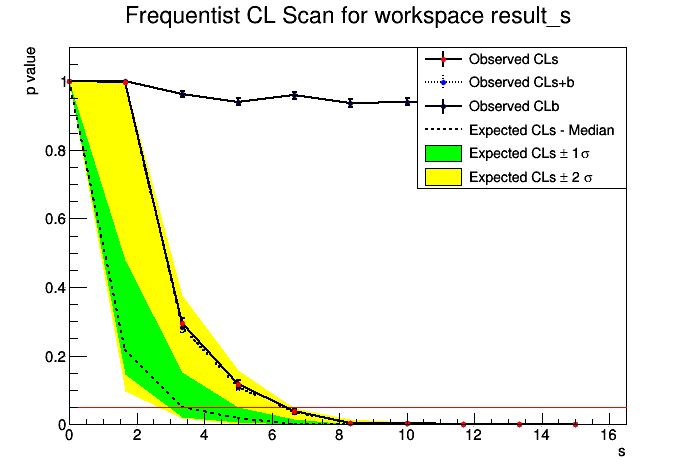

Warning in <TROOT::Append>: Replacing existing TH1: CLb_observed (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: CLs+b_observed (Potential memory leak).


In [13]:
// plot the scan 
gPad->Draw();

// plot also the test statistics distributions (use the canvas name - c2)

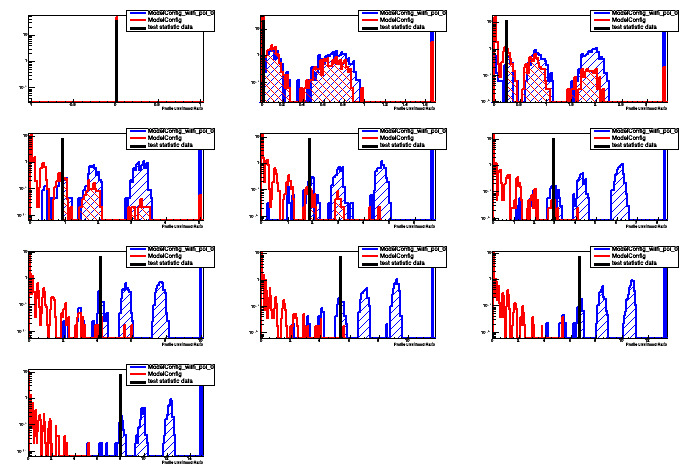

In [14]:
c2->Draw();

#### 5. Running the Hypothesis Test Calculators

In [15]:
.L /opt/root/tutorials/roostats/StandardHypoTestDemo.C

#### Parameter passed to the macro 



**StandardHypoTestDemo**`(filename, workspace, model for alternate (S+B), model for null (B), data`
`calculator type, test statistic type, [number of toys] )`



Calculator Type: 
* 0 FrequentistCalculator (uses toys)
* 1 HybridCalculator (uses toys)
* 2 AsymptoticCalculator

Test Statistic Type

* 0 Ratio of Likelihood (LEP TS)
* 1 Ratio of Profile Likelihoods (Tevatron TS)
* 2 Profile Likelihood Ratio (LHC) - 2 sided  
* 3 Profile Likelihood Ratio (LHC) - One-sided for discovery (recommended one)


In addition we can define some extra parameters

In [16]:
//optHT.useProof = true; 
optHT.nToysRatio = 4;  // ratiuo null/alt toys

In [17]:
StandardHypoTestDemo("CountingModel.root","w","ModelConfig","","data",0,3, 5000);


RooWorkspace(w) w contents

variables
---------
(b,b0,nobs,s,sigmab)

p.d.f.s
-------
RooGaussian::constraint[ x=b0 mean=b sigma=sigmab ] = 1
RooProdPdf::model[ pdf * constraint ] = 0.195367
RooPoisson::pdf[ x=nobs mean=nexp ] = 0.195367

functions
--------
RooAddition::nexp[ s + b ] = 4

datasets
--------
RooDataSet::data(nobs)

parameter snapshots
-------------------
ModelConfig__snapshot = (s=3)

named sets
----------
ModelConfig_GlobalObservables:(b0)
ModelConfig_NuisParams:(b)
ModelConfig_Observables:(nobs)
ModelConfig_POI:(s)
ModelConfig__snapshot:(s)

generic objects
---------------
RooStats::ModelConfig::ModelConfig


=== Using the following for ModelConfigB_only ===
Observables:             RooArgSet:: = (nobs)
Parameters of Interest:  RooArgSet:: = (s)
Nuisance Parameters:     RooArgSet:: = (b)
Global Observables:      RooArgSet:: = (b0)
PDF:                     RooProdPdf::model[ pdf * constraint ] = 0.195367
Snapshot:                
  1) 0x7f82d8b35660 RooRealVar:: s = 0 

Info in <StandardHypoTestInvDemo>: The background model  does not exist
Info in <StandardHypoTestInvDemo>: Copy it from ModelConfig ModelConfig and set POI to zero
Info in <StandardHypoTestDemo>: Pdf is not extended: number of events to generate taken  from observed data set is 1


[#0] PROGRESS:Generation -- generated toys: 500 / 5000
[#0] PROGRESS:Generation -- generated toys: 1000 / 5000
[#0] PROGRESS:Generation -- generated toys: 1500 / 5000
[#0] PROGRESS:Generation -- generated toys: 2000 / 5000
[#0] PROGRESS:Generation -- generated toys: 2500 / 5000
[#0] PROGRESS:Generation -- generated toys: 3000 / 5000
[#0] PROGRESS:Generation -- generated toys: 3500 / 5000
[#0] PROGRESS:Generation -- generated toys: 4000 / 5000
[#0] PROGRESS:Generation -- generated toys: 4500 / 5000
[#1] INFO:InputArguments -- Profiling conditional MLEs for Alt.
[#1] INFO:InputArguments -- Using a ToyMCSampler. Now configuring for Alt.
[#0] PROGRESS:Generation -- generated toys: 500 / 1250
[#0] PROGRESS:Generation -- generated toys: 1000 / 1250

Results HypoTestCalculator_result: 
 - Null p-value = 0.0516 +/- 0.0031285
 - Significance = 1.62953 +/- 0.0295825 sigma
 - Number of Alt toys: 1250
 - Number of Null toys: 5000
 - Test statistic evaluated on data: 1.22418
 - CL_b: 0.0516 +/- 0.0

Info in <StandardHypoTestDemo>: HypoTestResult has been written in the file Freq_HypoTest_ts3_CountingModel.root


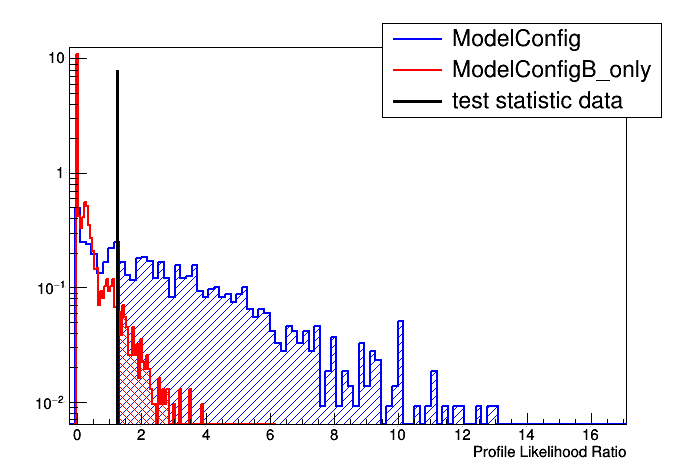

In [18]:
gPad->Draw();